<a href="https://colab.research.google.com/github/LuuZwide/Preprocessing-/blob/main/SKlearn_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I should know how to answer all these questions




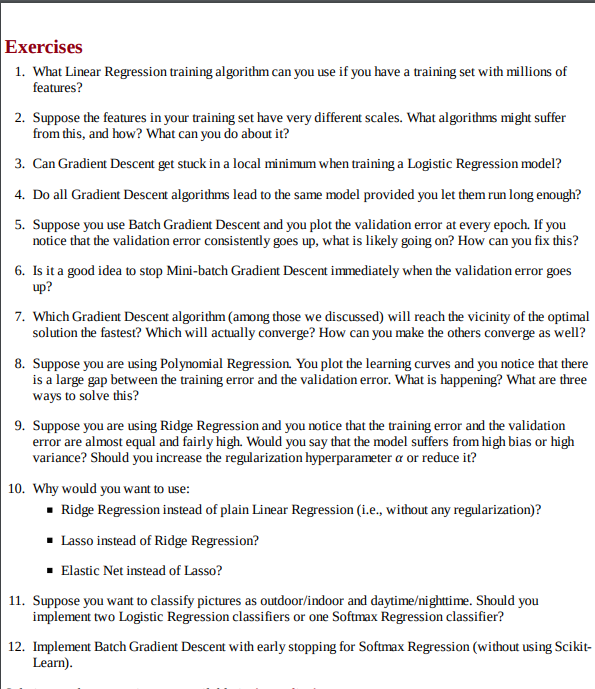

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Functions/Preprocessing/Precossing_Functions_for_stock_chpters_1.ipynb" .
%run Precossing_Functions_for_stock_chpters_1.ipynb

# This file has all the preprocessing functions

stock_pd = pd.read_csv('/content/drive/MyDrive/learning Keras Book/datasets /ge_ibm_combined.txt')
stock_pd = stock_pd.drop('OpenInt', axis = 1)

stock_pd.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Volume
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430


In [ ]:
ticker = yf.Ticker("AAPL")
apple_data = ticker.history(period="Max")
apple_data = apple_data.drop(['Dividends','Stock Splits'] , axis = 1)
apple_data.reset_index(drop = False, inplace = True)
apple_data.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600
1,1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800
2,1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000
3,1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600
4,1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600


In [ ]:
ticker = yf.Ticker("IBM")
ibm_data = ticker.history(period="Max")
ibm_data = ibm_data.drop(['Dividends','Stock Splits'] , axis = 1)
ibm_data.reset_index(drop = False, inplace = True)
ibm_data.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02 00:00:00-05:00,1.631551,1.631551,1.613219,1.613219,407940
1,1962-01-03 00:00:00-05:00,1.613219,1.627320,1.613219,1.627320,305955
2,1962-01-04 00:00:00-05:00,1.627320,1.627320,1.610398,1.611103,274575
3,1962-01-05 00:00:00-05:00,1.608988,1.608988,1.576554,1.579374,384405
4,1962-01-08 00:00:00-05:00,1.577963,1.577963,1.537069,1.549760,572685


In [ ]:
ticker = yf.Ticker("GE")
ge_data = ticker.history(period="Max")
ge_data = ge_data.drop(['Dividends','Stock Splits'] , axis = 1)
ge_data.reset_index(drop = False, inplace = True)
ge_data.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02 00:00:00-05:00,0.788355,0.801494,0.780471,0.785727,345317
1,1962-01-03 00:00:00-05:00,0.781786,0.781786,0.775216,0.777844,236606
2,1962-01-04 00:00:00-05:00,0.777844,0.784413,0.762077,0.768646,294159
3,1962-01-05 00:00:00-05:00,0.768646,0.769960,0.735798,0.748937,436442
4,1962-01-08 00:00:00-05:00,0.748937,0.748937,0.725287,0.747623,495593


In [ ]:
ticker = yf.Ticker("amzn")
amzn_data = ticker.history(period="Max")
amzn_data = amzn_data.drop(['Dividends','Stock Splits'] , axis = 1)
amzn_data.reset_index(drop = False, inplace = True)
amzn_data.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000


In [ ]:
ticker = yf.Ticker("GOOGL")
google_data = ticker.history(period="Max")
google_data = google_data.drop(['Dividends','Stock Splits'] , axis = 1)
google_data.reset_index(drop = False, inplace = True)
google_data.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044


In [ ]:
stock_pd = pd.concat([amzn_data ,ibm_data, apple_data])
stock_pd = stock_pd.reset_index(drop = True)
stock_pd.head()
stock_pd.describe()

,Open,High,Low,Close,Volume
count,32596.000000,32596.000000,32596.000000,32596.000000,3.259600e+04
mean,30.132168,30.439555,29.827619,30.139129,1.376166e+08
std,43.299786,43.727911,42.872532,43.307301,2.472513e+08
min,0.038588,0.038588,0.038154,0.038154,0.000000e+00
25%,1.639201,1.657428,1.623981,1.641132,4.598216e+06
50%,7.244000,7.354081,7.140707,7.249162,4.840600e+07
75%,46.547664,47.050361,46.086566,46.576185,1.642312e+08
max,187.199997,188.654007,184.839493,186.570496,7.421641e+09


In [ ]:
prices = stock_pd['Close']
len_of_data = len(prices)
window_size = 5
stock_dataset = Combine_dataframes(stock_pd ,prices, window_size,len_of_data, fast = 12, slow = 26)



val_data = apple_data
val_prices = val_data['Close']
len_of_data = len(val_prices)
window_size = 5
val_dataset = Combine_dataframes(val_data ,val_prices, window_size,len_of_data, fast = 12, slow = 26)

In [ ]:
attribute = 'moving_avg'
split_cat = 'avg_cat'
dividing_value = 5
max_value = 10
set_max_value = 10
stock_dataframe = cat_for_split(stock_dataset,attribute, split_cat, dividing_value, max_value, set_max_value)


val_dataframe = cat_for_split(val_dataset,attribute, split_cat, dividing_value, max_value, set_max_value)

In [ ]:
X = stock_dataframe.drop('next_close', axis = 1)
y = stock_dataframe['next_close']

print('train y: ', y.shape)
print('train x : ',X.shape )

X_val = val_dataframe.drop('next_close', axis = 1)
y_val = val_dataframe['next_close']

print('val y: ', y_val.shape)
print('val x : ',X_val.shape )

train y:  (32596,)
train x :  (32596, 13)
val y:  (10665,)
val x :  (10665, 13)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
attribs = list(x_train.columns)
#attribs = list(['Open', 'High', 'Low', 'Close', 'moving_avg', 'exm_avg'])
print(attribs)
#or


['Open', 'High', 'Low', 'Close', 'Volume', 'moving_avg', 'exm_avg', 'STOCHk_5_3_3', 'STOCHd_5_3_3', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'avg_cat']


In [ ]:
data_pipeline = Pipeline(
    [
        ('ConvertDataFrame',DataFrameSelector(attribs)),
        ('scalar',StandardScaler())
    ]
)

x_train_prepared = data_pipeline.fit_transform(x_train)
print('x_train shape: ',x_train_prepared.shape)
print('y_train shape: ',y_train.shape)

x_val_prepared = data_pipeline.fit_transform(X_val)
print('x_val shape: ',x_val_prepared.shape)
print('y_val shape: ',y_val.shape)

x_train shape:  (26076, 13)
y_train shape:  (26076,)
x_val shape:  (10665, 13)
y_val shape:  (10665,)


# **Polynomial Regression**

In [ ]:
poly_features =  PolynomialFeatures(degree = 4, include_bias = False)
x_poly = poly_features.fit_transform(x_train_prepared)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(x_poly, y_train)

LinearRegression()

In [ ]:
scores = cross_val_score(poly_lin_reg, x_poly, y_train , scoring = 'neg_mean_squared_error', cv = 5)
mse_scores = np.mean(-scores)
print('MSE: ', mse_scores)
rmse_scores = np.sqrt(mse_scores)
print('RMSE: ', rmse_scores)

In [ ]:
plot_learning_curves(poly_lin_reg, x_poly, y_train, 50)

# **Linear Regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared, y_train)
scores = cross_val_score(lin_reg, x_train_prepared, y_train , scoring = 'neg_mean_squared_error', cv = 10)
mse_scores = np.mean(-scores)
print('MSE: ', mse_scores)
rmse_scores = np.sqrt(mse_scores)
print('RMSE: ', rmse_scores)

MSE:  2.3391987444915294
RMSE:  1.5294439330984086


In [ ]:
model = lin_reg
predictions = model.predict(x_val_prepared)
model_mse = mean_squared_error(y_val, predictions)
print('mse: ', model_mse)
print('rmse: ', np.sqrt(model_mse))
print(y_val[-1:])
print(predictions[-1:])

mse:  785.3947227612682
rmse:  28.024894696702578
10664    164.899994
Name: next_close, dtype: float64
[240.66564062]


In [ ]:
plot_learning_curves(lin_reg, x_poly, y_train, 50)

# **SGDRegressor**

In [ ]:
poly_sgd_reg = SGDRegressor(max_iter = 1000, penalty = None, eta0 = 0.001, shuffle = True)
poly_sgd_reg.fit(x_train_prepared, y_train)
scores = cross_val_score(poly_sgd_reg, x_train_prepared, y_train , scoring = 'neg_mean_squared_error', cv = 10)
mse_scores = np.mean(-scores)
print('MSE: ', mse_scores)
rmse_scores = np.sqrt(mse_scores)
print('RMSE: ', rmse_scores)

In [ ]:
plot_learning_curves(poly_sgd_reg, x_train_prepared, y_train, 50)

In [ ]:
sgd_grid = [
  {'penalty':['l1','l2'], 'shuffle':[True, False], 'eta0':[0.1,0.001]},
]

sgd_grid_2 = [
      {'penalty':['elasticnet'], 'shuffle':[True, False], 'early_stopping':[True, False], 'l1_ratio':[0.15, 0.3,0.5] }
]
sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, sgd_grid_2, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train_prepared, y_train)

In [ ]:
print('best params: ', grid_search.best_params_)
print('best estimator: ',grid_search.best_estimator_)
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
  print(np.sqrt(-mean_score),params)

In [ ]:
model = grid_search.best_estimator_
predictions = model.predict(x_val_prepared)
model_mse = mean_squared_error(y_val, predictions)
print('mse: ', model_mse)
print('rmse: ', np.sqrt(model_mse))
print(y_val[-10:])
print(predictions[-10:])

In [ ]:
print(y_val[-10:] )
print(predictions[-10:])

In [ ]:
print(y_val[-2:])

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_prepared, y_train)

In [ ]:
predictions = forest_reg.predict(x_val_prepared)
svr_mse = mean_squared_error(y_val, predictions)
print('mse: ', svr_mse)
svr_rmse = np.sqrt(svr_mse)
print('rmse: ', svr_rmse)

In [ ]:
print(y_val[-1:] )
print(predictions[-1:])

In [ ]:
rf_grid = [
    {'n_estimators': [10, 50 ,100], 'max_features': [2,5,8,10]},
    {'n_estimators':[3,10], 'max_features':[2,4,6]}
]

In [ ]:
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf_reg, rf_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train_prepared, y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
model = grid_search.best_estimator_
predictions = model.predict(x_val_prepared)
model_mse = mean_squared_error(y_val, predictions)
print('mse: ', model_mse)
print('rmse: ', np.sqrt(model_mse))
print(predictions[-120:])

# **Ridge Regression**

In [ ]:
ridge_reg = Ridge(alpha = 1e-5,  solver = 'cholesky')
ridge_reg.fit(x_train_prepared, y_train)
predictions = ridge_reg.predict(x_val_prepared)
ridge_mse = mean_squared_error(y_val, predictions)
print('mse: ', ridge_mse)
print('rmse: ',  np.sqrt(ridge_mse))

mse:  259.1365830575468
rmse:  16.09771980926326


In [ ]:
print(y_val[-10:])
print(predictions[-10:])

# **Lasso**

In [ ]:
lasso_reg = Ridge(alpha = 0.1)
lasso_reg.fit(x_train_prepared, y_train)
predictions = lasso_reg.predict(x_val_prepared)
lasso_mse = mean_squared_error(y_val, predictions)
print('mse: ', lasso_mse)
print('rmse: ',  np.sqrt(lasso_mse))

mse:  259.166514942567
rmse:  16.09864947573451


In [ ]:
elastic_net = ElasticNet(alpha = 1.4, l1_ratio = 0.01)
elastic_net.fit(x_train_prepared, y_train)
predictions = elastic_net.predict(x_val_prepared)
elastic_mse = mean_squared_error(y_val, predictions)
print('mse: ', elastic_mse)
print('rmse: ',  np.sqrt(elastic_mse))

mse:  212.68513010676384
rmse:  14.583728264979564


In [ ]:
print(y_val[-1:])
print(predictions[-1:])

10664    164.899994
Name: next_close, dtype: float64
[173.0342966]
